<a href="https://colab.research.google.com/github/Raed11998/Task2/blob/main/task4ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# تحميل الملف
df = pd.read_csv("/content/syria.csv")

# 👁️‍🗨️ استبعاد الصفوف التي تحتوي على وسوم وصفية (Metadata rows)
df = df[~df['country'].astype(str).str.contains('#', na=False)].copy()

# 🧹 تحويل الأعمدة الرقمية من نصوص إلى أرقام (مع تجاهل الأخطاء)
numeric_columns = ["year", "best", "deaths_a", "deaths_b", "deaths_civilians", "number_of_sources"]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# 📆 تحويل الأعمدة الزمنية لتواريخ (إذا كانت موجودة)
if "date_start" in df.columns:
    df["date_start"] = pd.to_datetime(df["date_start"], errors="coerce")

if "date_end" in df.columns:
    df["date_end"] = pd.to_datetime(df["date_end"], errors="coerce")

# ✅ معاينة أولية بعد التنظيف
print("🧾 عدد الصفوف بعد التنظيف:", len(df))
print("📊 الأعمدة وأنواعها:")
print(df.dtypes)

# 👀 عرض أول 5 صفوف

<ipython-input-79-4e06ec038bfb>:4: DtypeWarning: Columns (2,29,30,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/syria.csv")


🧾 عدد الصفوف بعد التنظيف: 86755
📊 الأعمدة وأنواعها:
id                          float64
relid                        object
year                          int64
active_year                 float64
code_status                  object
type_of_violence            float64
conflict_dset_id            float64
conflict_new_id             float64
conflict_name                object
dyad_dset_id                float64
dyad_new_id                 float64
dyad_name                    object
side_a_dset_id              float64
side_a_new_id               float64
side_a                       object
side_b_dset_id              float64
side_b_new_id               float64
side_b                       object
number_of_sources           float64
source_article               object
source_office                object
source_date                  object
source_headline              object
source_original              object
where_prec                  float64
where_coordinates            object
where_descri

In [ ]:


# التأكد من أن القيم في عمود الدولة هي لسوريا فقط
df_syria = df[df["country"] == "Syria"].copy()

# إعادة ضبط الفهارس
df_syria.reset_index(drop=True, inplace=True)

# عرض ملخص للبيانات بعد الفلترة
print("✅ عدد الحوادث المسجلة في سوريا:", len(df_syria))
print("📍 عدد المحافظات (adm_1) المختلفة:", df_syria["adm_1"].nunique())
print("🗓️ عدد السنوات المغطاة:", df_syria["year"].nunique())
print("🎯 أنواع العنف الموجودة:", df_syria["type_of_violence"].unique())

# عرض بعض الصفوف من بيانات سوريا
print(df_syria.head())

✅ عدد الحوادث المسجلة في سوريا: 86755
📍 عدد المحافظات (adm_1) المختلفة: 14
🗓️ عدد السنوات المغطاة: 15
🎯 أنواع العنف الموجودة: [1. 3. 2.]
         id                relid  year  active_year code_status  \
0  177142.0  ISR-2004-1-381-1998  2004          1.0       Clear   
1  314095.0     ISR-2019-1-478-2  2019          1.0       Clear   
2  337938.0     ISR-2020-1-478-2  2020          0.0       Clear   
3  372692.0     IRQ-2013-1-524-0  2013          1.0       Clear   
4  355186.0    IRQ-2014-1-524-99  2014          1.0       Clear   

   type_of_violence  conflict_dset_id  conflict_new_id      conflict_name  \
0               1.0             234.0            234.0  Israel: Palestine   
1               1.0             234.0            234.0  Israel: Palestine   
2               1.0             234.0            234.0  Israel: Palestine   
3               1.0             259.0            259.0   Iraq: Government   
4               1.0             259.0            259.0   Iraq: Government  

In [ ]:


df = df[~df['country'].astype(str).str.contains('#', na=False)].copy()

# فلترة الصفوف التي تخص سوريا فقط
df_syria = df[df["country"] == "Syria"].copy()

# إعادة ضبط الفهارس فقط (لا يتم حذف أي أعمدة)
df_syria.reset_index(drop=True, inplace=True)

# حفظ البيانات في ملف جديد
df_syria.to_csv("syria_filtered.csv", index=False)

print("✅ تم حفظ البيانات الخاصة بسوريا في ملف: syria_filtered.csv")

✅ تم حفظ البيانات الخاصة بسوريا في ملف: syria_filtered.csv


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# إعداد العرض
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# تحميل البيانات المفلترة
df = pd.read_csv("/content/syria_filtered.csv")

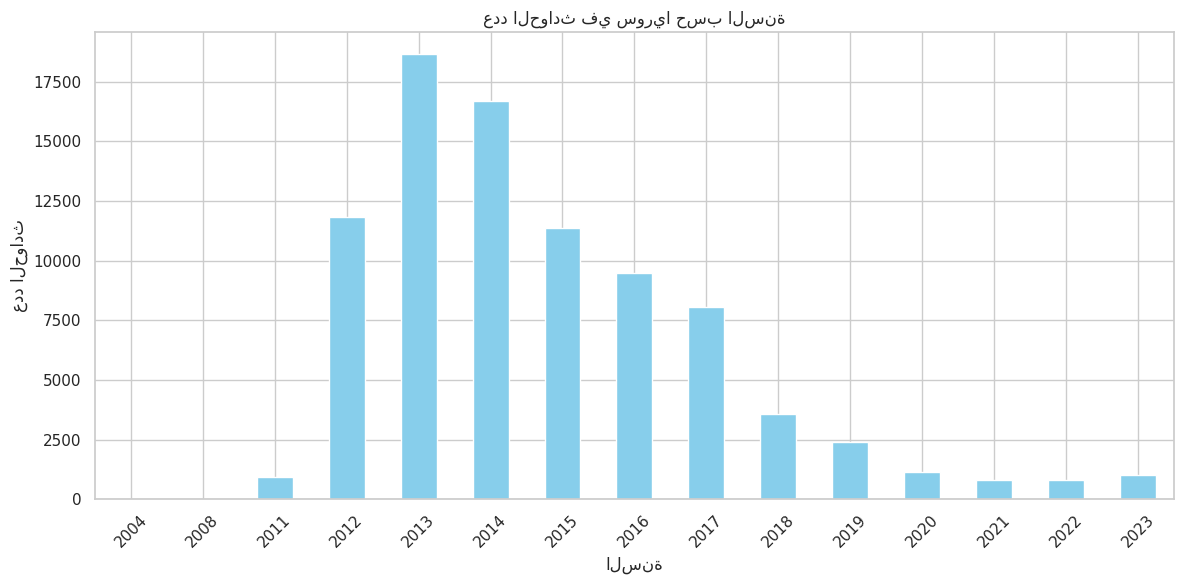

In [ ]:


# عدد الحوادث حسب السنة
yearly_incidents = df['year'].value_counts().sort_index()

# رسم بياني
yearly_incidents.plot(kind='bar', color='skyblue')
plt.title("عدد الحوادث في سوريا حسب السنة")
plt.xlabel("السنة")
plt.ylabel("عدد الحوادث")
plt.xticks(rotation=45)
plt.tight_layout()
#الحفظ في ملف
#plt.savefig(f"maps_output/syria_forces_{year}.png", dpi=300)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


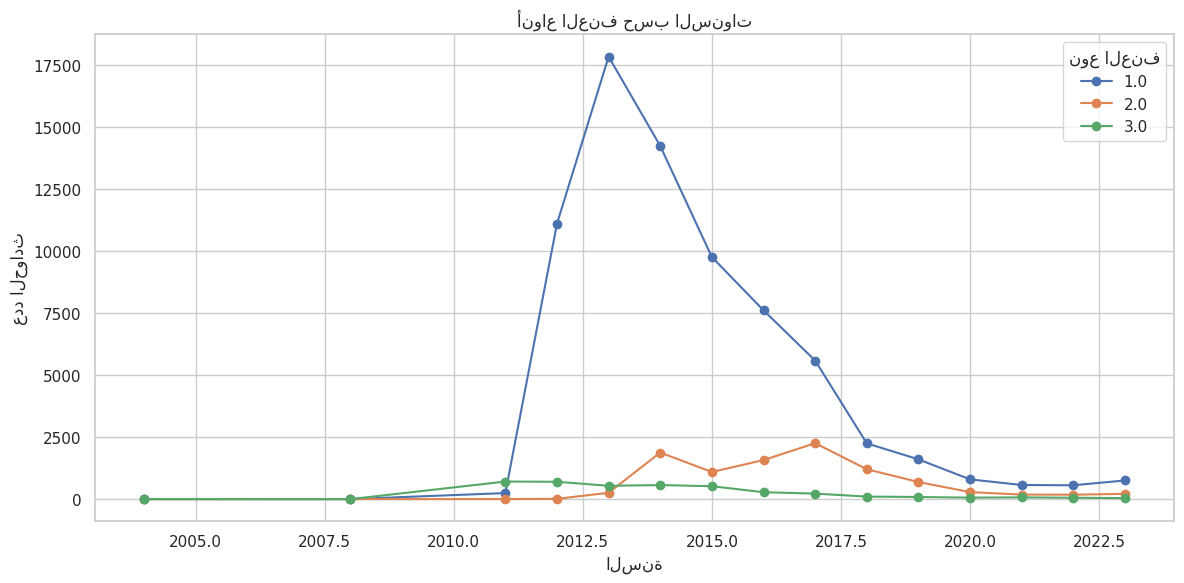

In [ ]:


# توزيع أنواع العنف حسب السنوات
violence_trend = df.groupby(['year', 'type_of_violence']).size().unstack(fill_value=0)

# رسم بياني
violence_trend.plot(kind='line', marker='o')
plt.title("أنواع العنف حسب السنوات")
plt.xlabel("السنة")
plt.ylabel("عدد الحوادث")
plt.legend(title="نوع العنف")
plt.grid(True)
plt.tight_layout()
plt.show()

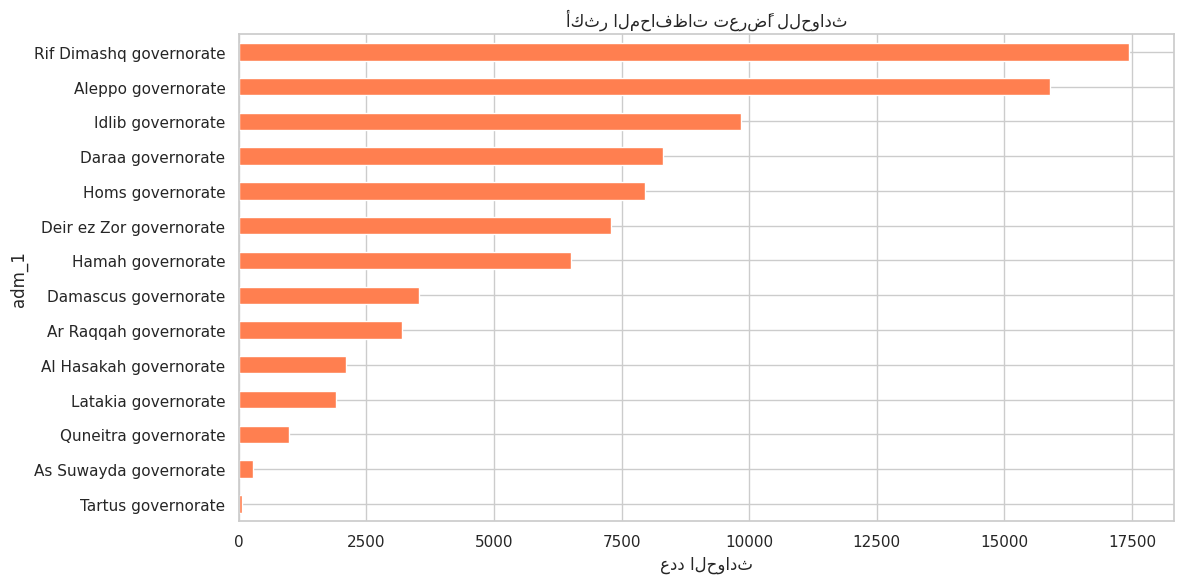

In [ ]:


top_provinces = df["adm_1"].value_counts().head(15)
top_provinces.plot(kind='barh', color='coral')
plt.title("أكثر المحافظات تعرضًا للحوادث")
plt.xlabel("عدد الحوادث")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:


# أكثر الأطراف تكرارًا في Side A و Side B
top_side_a = df["side_a"].value_counts().head(5)
top_side_b = df["side_b"].value_counts().head(5)

print("📌 أكثر الأطراف ظهورًا في Side A:\n", top_side_a)
print("\n📌 أكثر الأطراف ظهورًا في Side B:\n", top_side_b)

📌 أكثر الأطراف ظهورًا في Side A:
 side_a
Government of Syria            74462
IS                              7030
SNA                              608
Hawar Kilis Operations Room      501
Syrian insurgents                350
Name: count, dtype: int64

📌 أكثر الأطراف ظهورًا في Side B:
 side_b
Syrian insurgents    65706
IS                    8999
SDF                   5206
Civilians             3953
PYD                    700
Name: count, dtype: int64


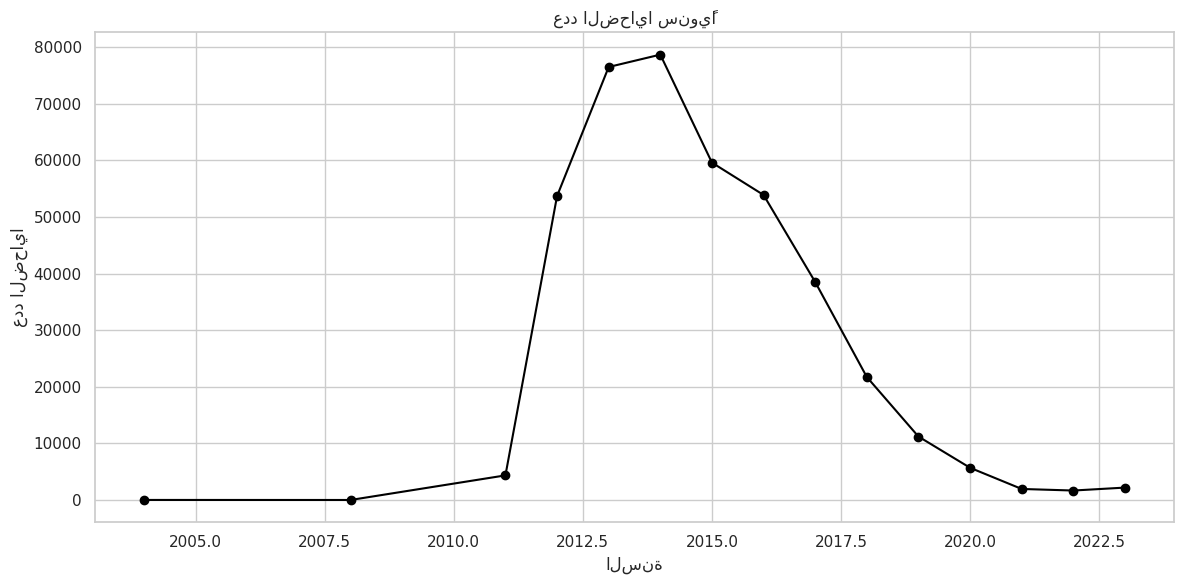

In [ ]:

#📆 إجمالي عدد الضحايا سنويًا:

df.groupby("year")["best"].sum().plot(kind="line", marker='o', color='black')
plt.title("عدد الضحايا سنويًا")
plt.xlabel("السنة")
plt.ylabel("عدد الضحايا")
plt.grid(True)
plt.tight_layout()
plt.show()

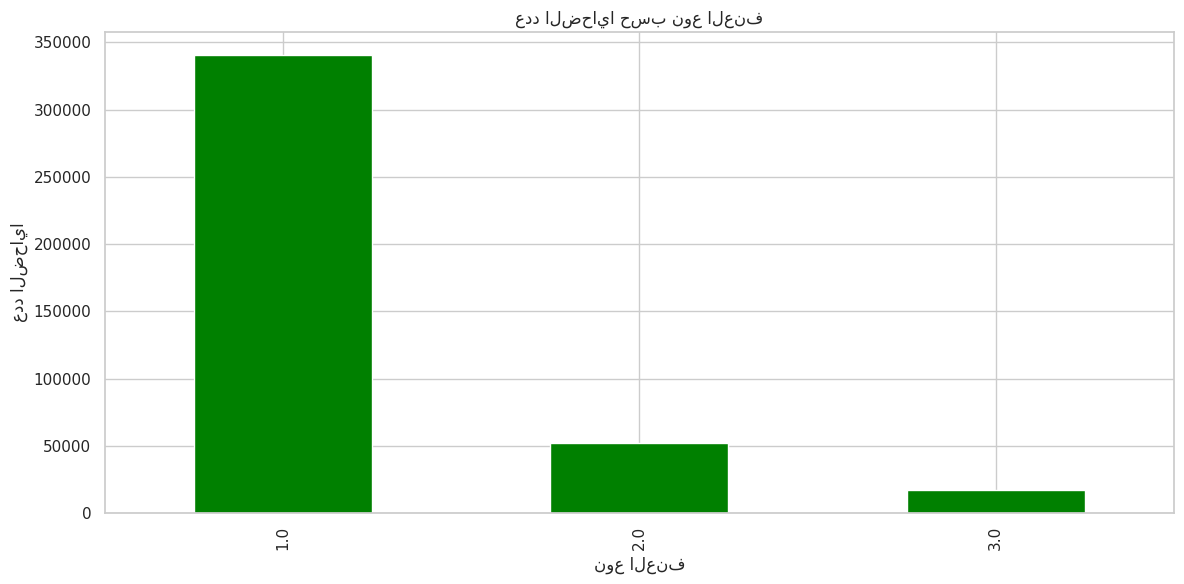

In [ ]:

df.groupby("type_of_violence")["best"].sum().plot(kind="bar", color='green')
plt.title("عدد الضحايا حسب نوع العنف")
plt.xlabel("نوع العنف")
plt.ylabel("عدد الضحايا")
plt.tight_layout()
plt.show()

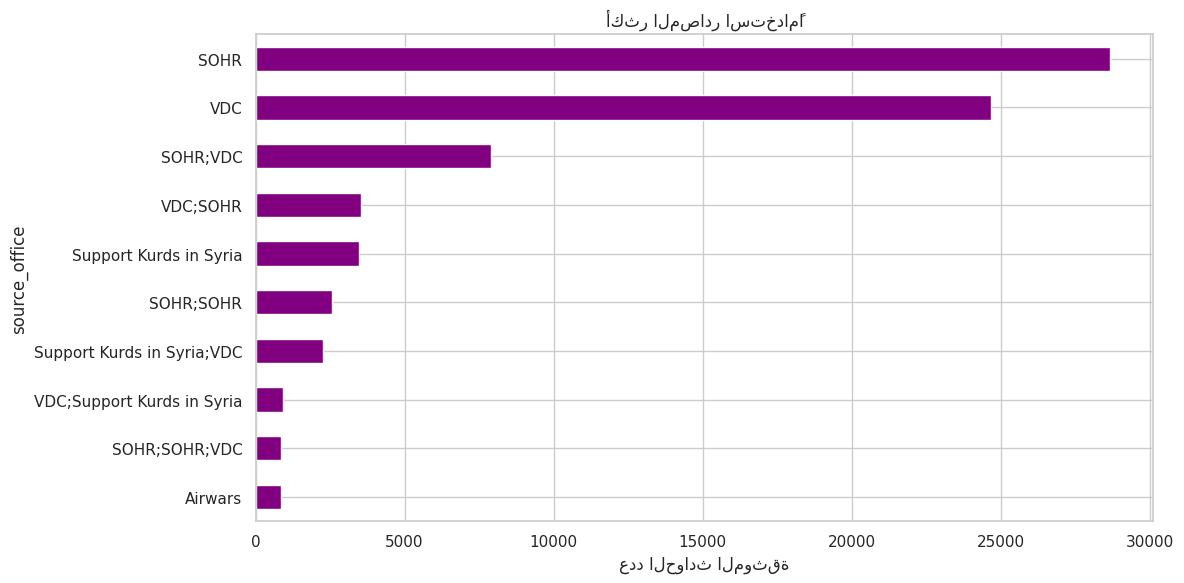

In [ ]:


# أكثر المصادر استخدامًا
top_sources = df["source_office"].value_counts().head(10)
top_sources.plot(kind='barh', color='purple')
plt.title("أكثر المصادر استخدامًا")
plt.xlabel("عدد الحوادث الموثقة")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:

import folium
from folium.plugins import HeatMap

# تأكد من وجود إحداثيات
heat_data = df[["latitude", "longitude", "best"]].dropna()

# إنشاء خريطة متمركزة على سوريا
map_syria = folium.Map(location=[35.0, 38.5], zoom_start=6)

# إضافة خريطة حرارية (كلما زادت قيمة 'best' زاد وهج النقطة)
HeatMap(data=heat_data[["latitude", "longitude", "best"]].values, radius=12, max_zoom=13).add_to(map_syria)

# عرض الخريطة
map_syria.save("heatmap_syria.html")

In [ ]:

import pandas as pd

# جدول عدد أنواع العنف لكل محافظة
violence_counts = pd.crosstab(df['adm_1'], df['type_of_violence'])

# حساب النسب المئوية داخل كل محافظة
violence_percent = violence_counts.div(violence_counts.sum(axis=1), axis=0) * 100

# تحديد أكثر 10 محافظات من حيث عدد الحوادث
top10_provinces = violence_counts.sum(axis=1).sort_values(ascending=False).head(14).index

# تصفية النسب للمحافظات العشر الأوائل
violence_percent_top10 = violence_percent.loc[top10_provinces]

# تقريب النسب لأقرب رقم عشري واحد (مثلاً: 27.3%)
violence_percent_top10 = violence_percent_top10.round(1)

# إعادة تسمية الأعمدة لأسماء أوضح إذا أردت
violence_percent_top10.columns = [f"نوع {i}" for i in violence_percent_top10.columns]

# عرض الجدول النهائي
print("🔍 النسبة المئوية لأنواع العنف داخل كل محافظة (أكثر 10 محافظات):")
display(violence_percent_top10)

🔍 النسبة المئوية لأنواع العنف داخل كل محافظة (أكثر 10 محافظات):


نوع 1.0  نوع 2.0  نوع 3.0
adm_1                                             
Rif Dimashq governorate     94.3      2.6      3.0
Aleppo governorate          76.3     20.0      3.7
Idlib governorate           92.5      4.6      2.9
Daraa governorate           90.1      5.9      4.0
Homs governorate            94.1      0.8      5.1
Deir ez Zor governorate     65.7     25.2      9.1
Hamah governorate           94.8      0.9      4.3
Damascus governorate        89.7      3.6      6.7
Ar Raqqah governorate       35.5     56.9      7.5
Al Hasakah governorate      29.9     61.0      9.2
Latakia governorate         96.4      0.0      3.6
Quneitra governorate        97.7      1.2      1.1
As Suwayda governorate      92.8      0.0      7.2
Tartus governorate          59.7      0.0     40.3

<ipython-input-93-000a63df23f1>:35: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


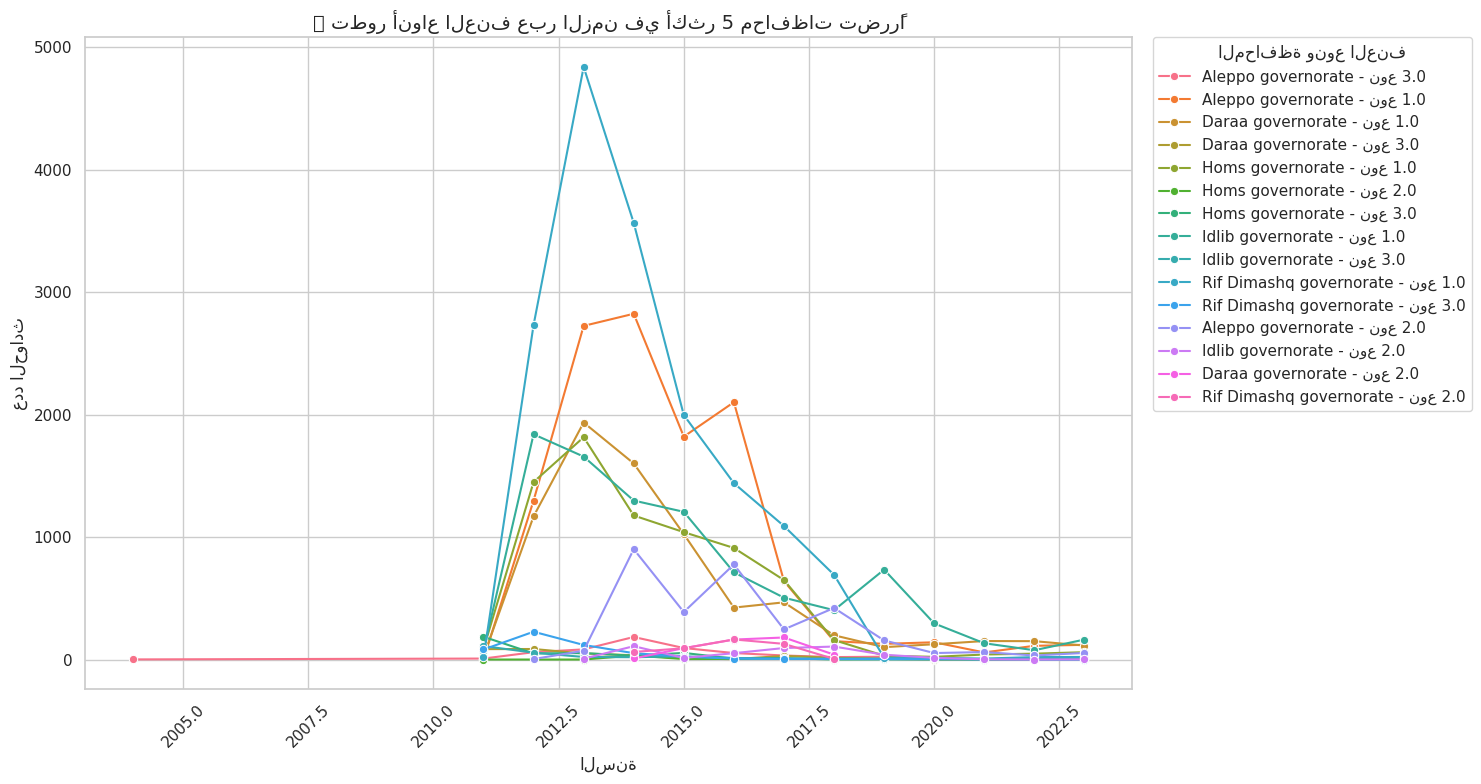

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. تحضير البيانات
df_time = df[['year', 'adm_1', 'type_of_violence']].dropna()

# 2. اختيار أكثر 5 محافظات تسجيلًا للحوادث
top_provinces = df['adm_1'].value_counts().head(5).index
df_top = df_time[df_time['adm_1'].isin(top_provinces)]

# 3. حساب عدد كل نوع عنف حسب المحافظة والسنة
violence_timeline = df_top.groupby(['year', 'adm_1', 'type_of_violence']).size().reset_index(name='count')

# 4. إضافة عمود لدمج نوع العنف واسم المحافظة معًا لسهولة التصنيف
violence_timeline['category'] = violence_timeline['adm_1'] + " - نوع " + violence_timeline['type_of_violence'].astype(str)

# 5. الرسم البياني
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")

sns.lineplot(
    data=violence_timeline,
    x='year',
    y='count',
    hue='category',
    marker='o'
)

plt.title("📈 تطور أنواع العنف عبر الزمن في أكثر 5 محافظات تضررًا", fontsize=14)
plt.xlabel("السنة", fontsize=12)
plt.ylabel("عدد الحوادث", fontsize=12)
plt.legend(title="المحافظة ونوع العنف", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:

import geopandas as gpd

# تحميل الخريطة
gdf = gpd.read_file("geoBoundaries-SYR-ADM0_simplified.geojson")

# عرض أسماء الأعمدة
print(gdf.columns)

Index(['shapeName', 'shapeISO', 'shapeID', 'shapeGroup', 'shapeType',
       'geometry'],
      dtype='object')


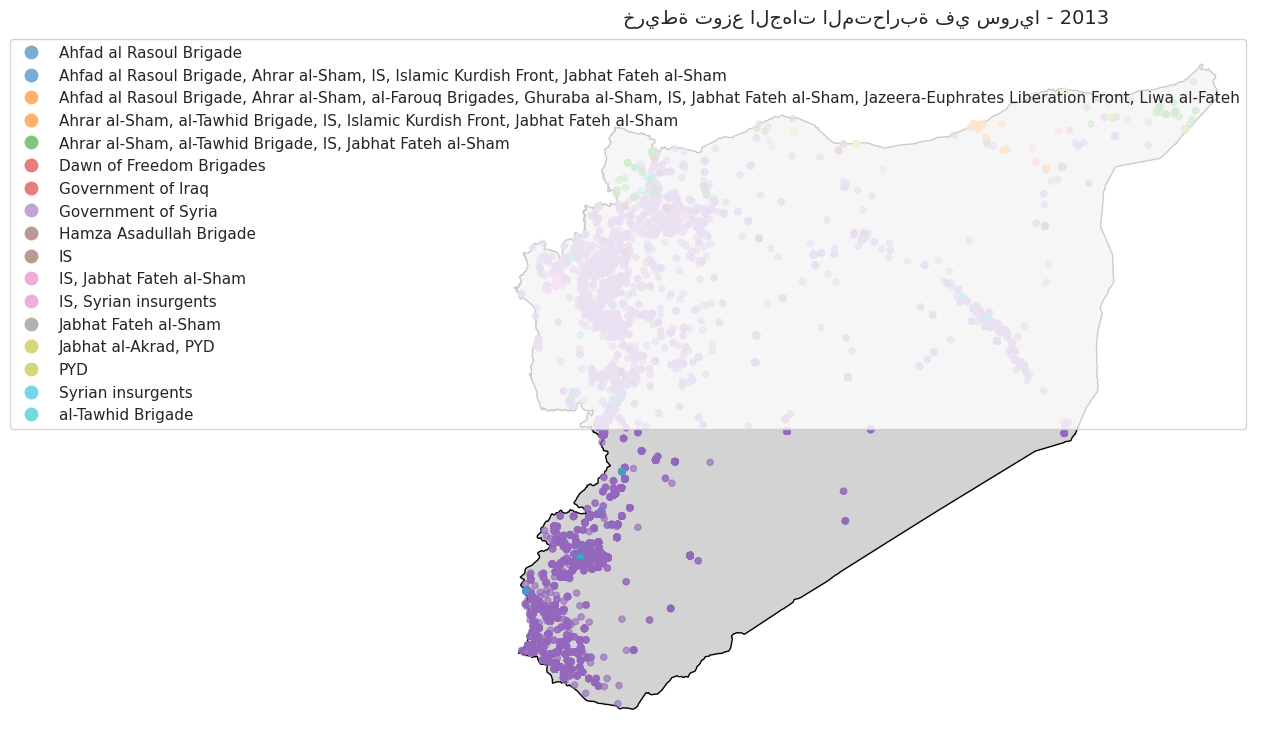

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# تحميل خريطة سوريا
syria_map = gpd.read_file("geoBoundaries-SYR-ADM0_simplified.geojson")

# نفترض أن بياناتك في df وتحتوي على الأعمدة التالية:
# 'year', 'latitude', 'longitude', 'side_a'

# تصفية البيانات لسنة معينة (مثلاً 2013)
year = 2013
df_year = df[df['year'] == year].dropna(subset=['latitude', 'longitude', 'side_a'])

# تحويل DataFrame إلى GeoDataFrame
gdf_points = gpd.GeoDataFrame(
    df_year,
    geometry=gpd.points_from_xy(df_year['longitude'], df_year['latitude']),
    crs="EPSG:4326"
)

# رسم الخريطة
fig, ax = plt.subplots(figsize=(10, 10))
syria_map.plot(ax=ax, color='lightgray', edgecolor='black')

# رسم النقاط وتلوينها حسب الجهة المتحاربة side_a
gdf_points.plot(ax=ax, column='side_a', legend=True, alpha=0.6, markersize=20)

plt.title(f"خريطة توزع الجهات المتحاربة في سوريا - {year}", fontsize=14)
plt.axis('off')
plt.show()

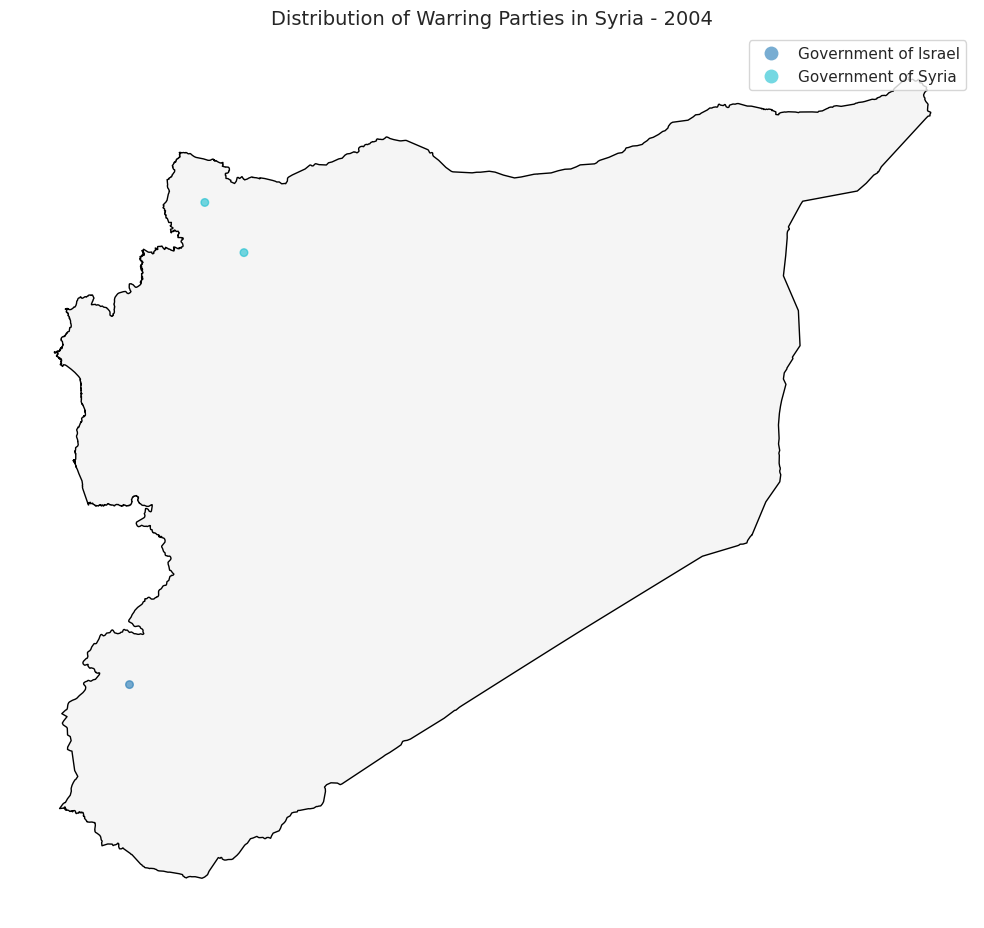

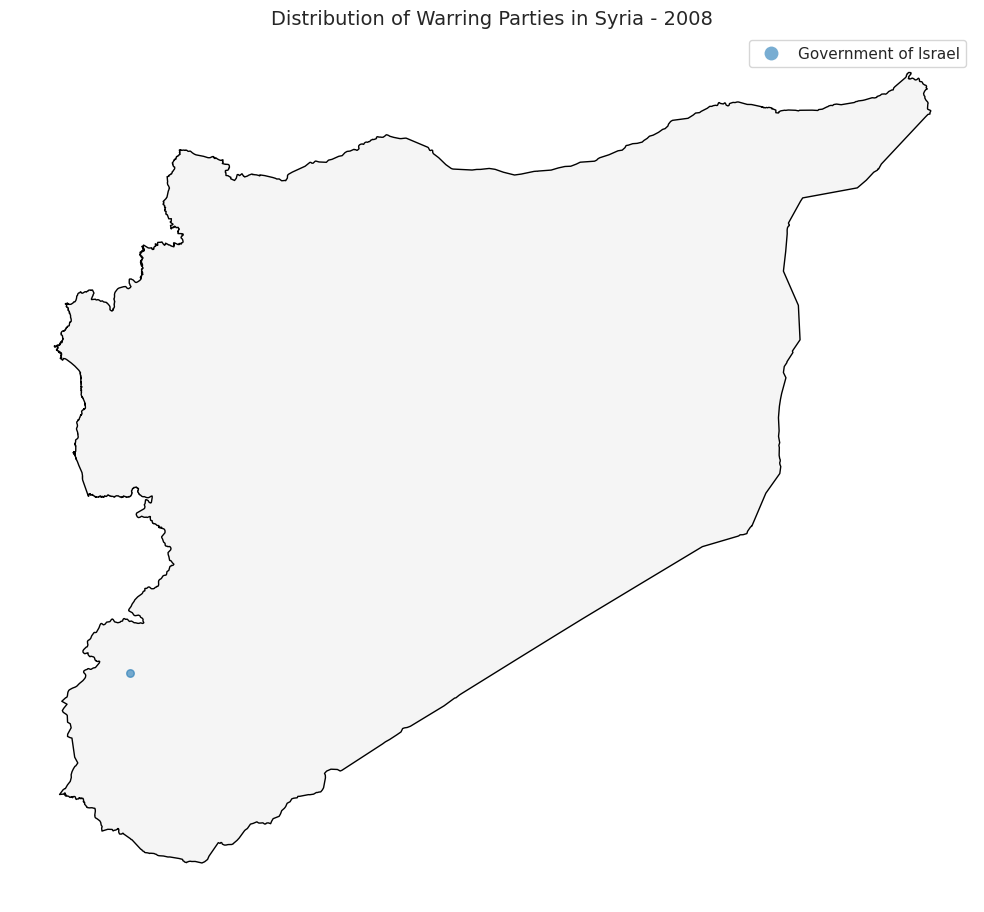

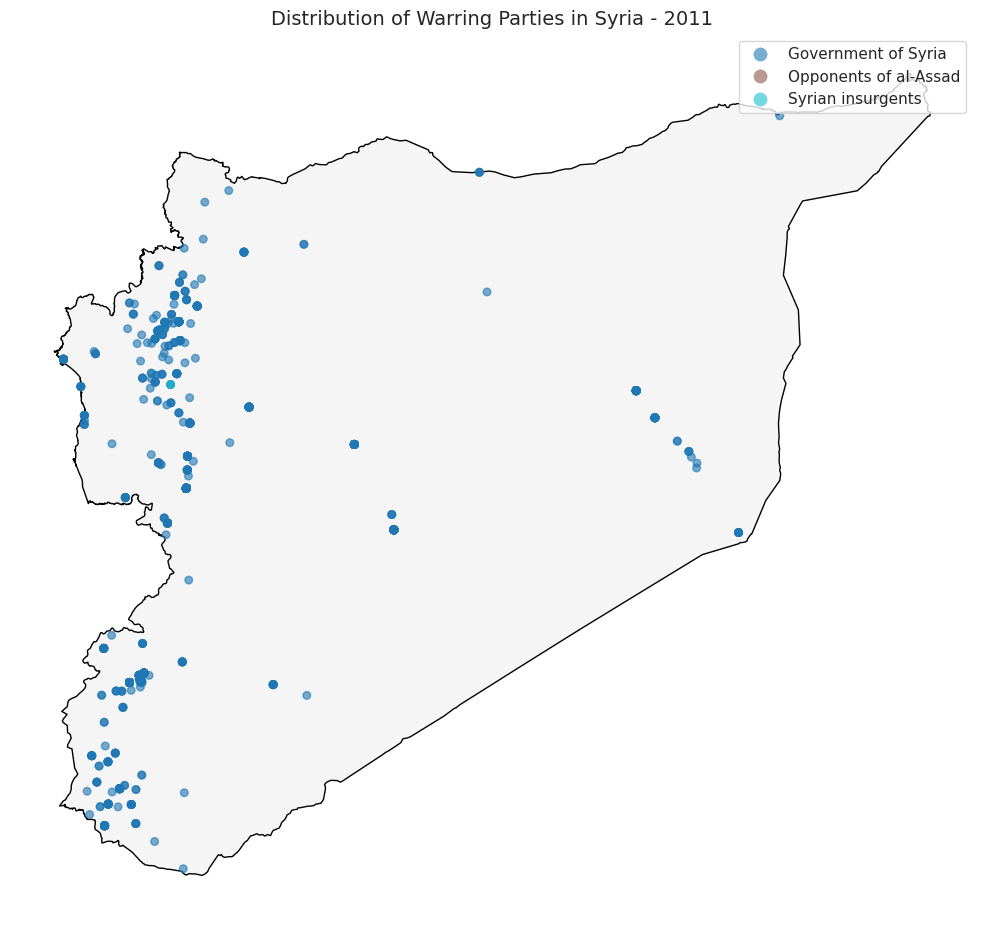

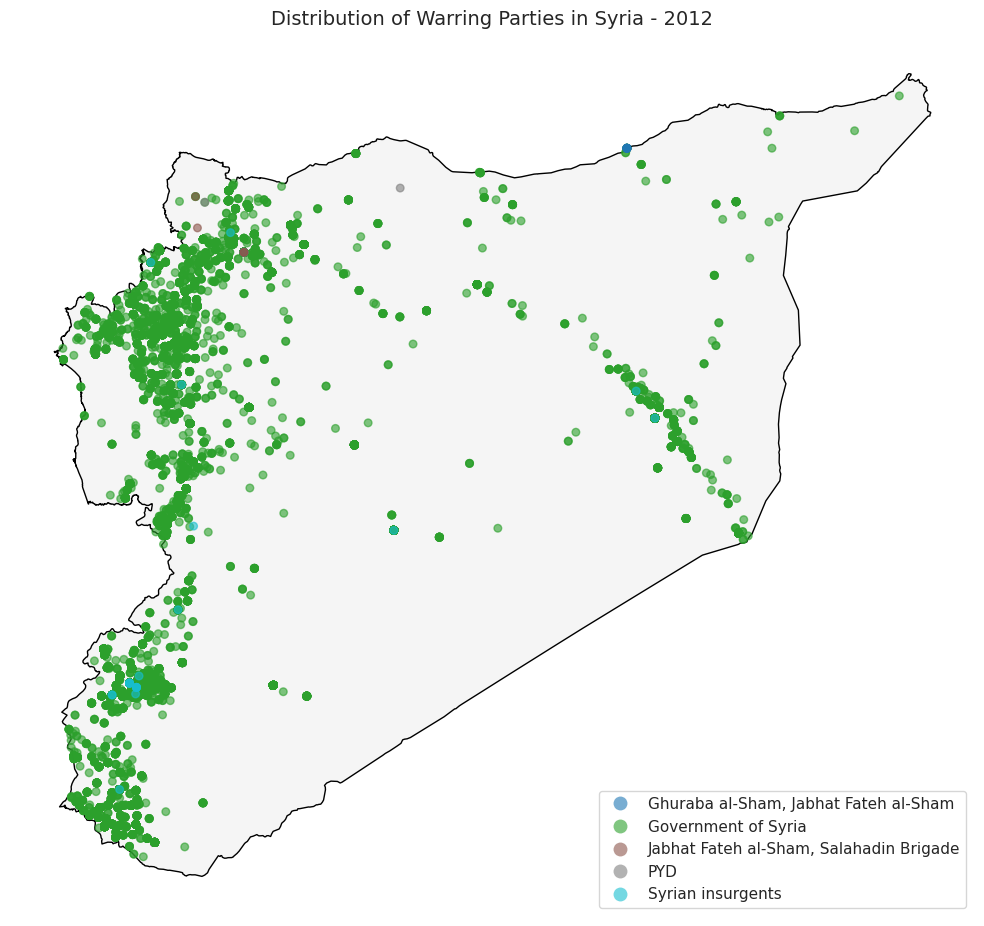

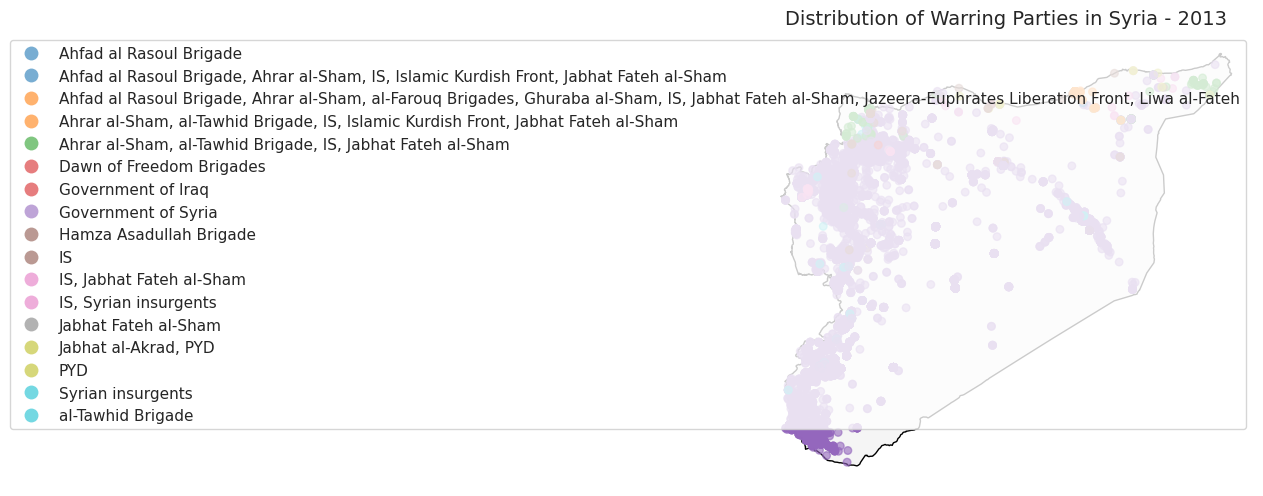

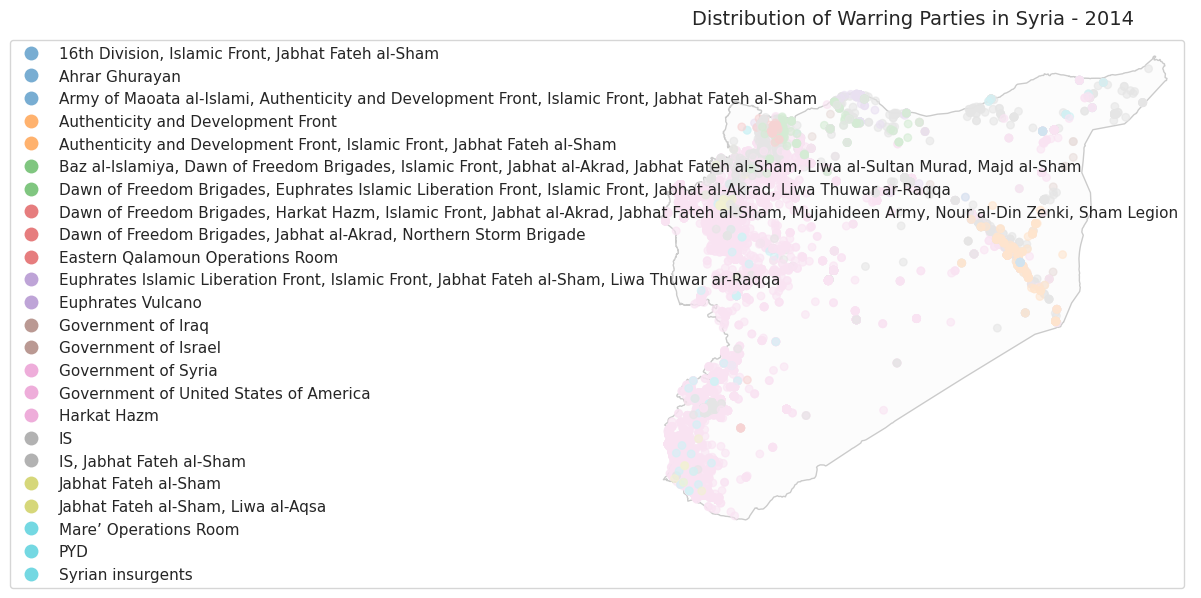

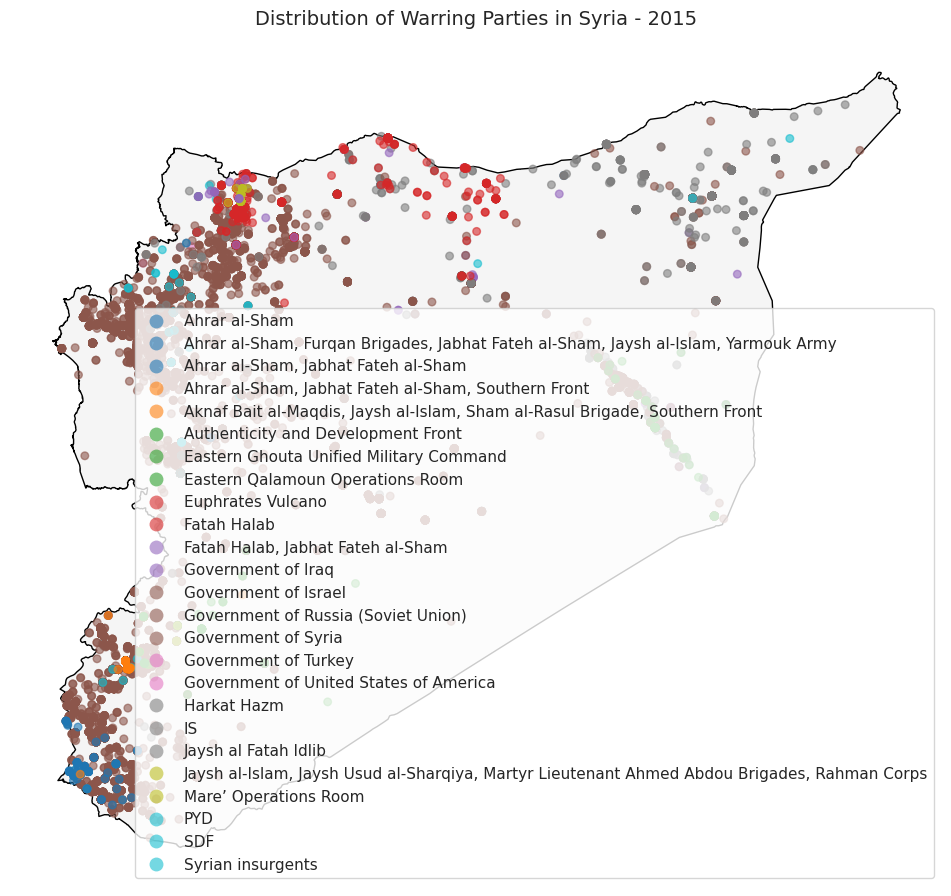

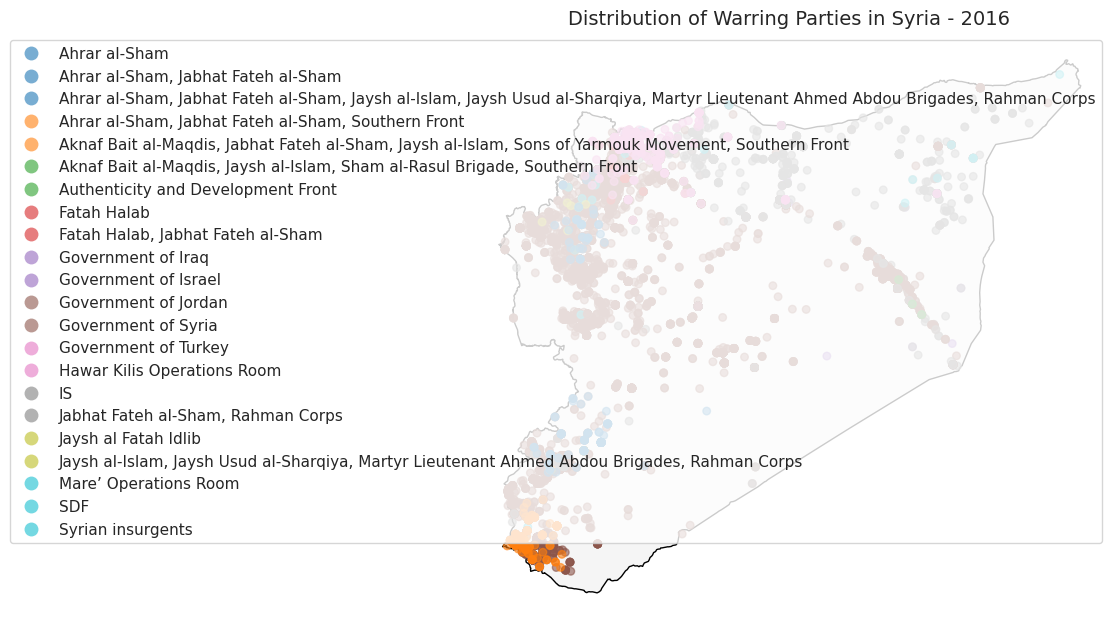

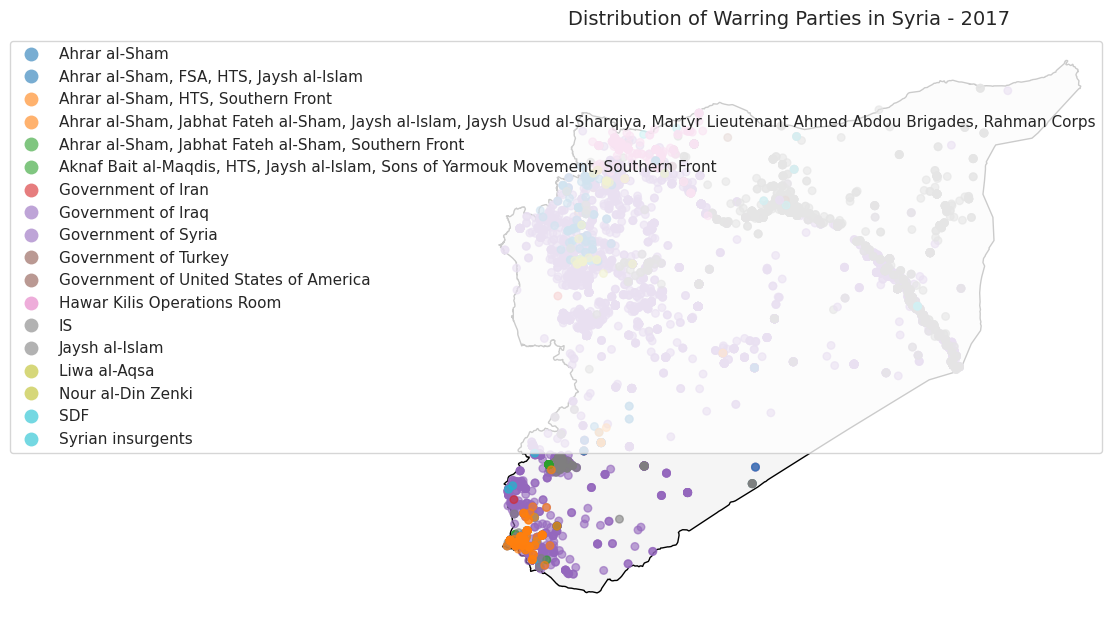

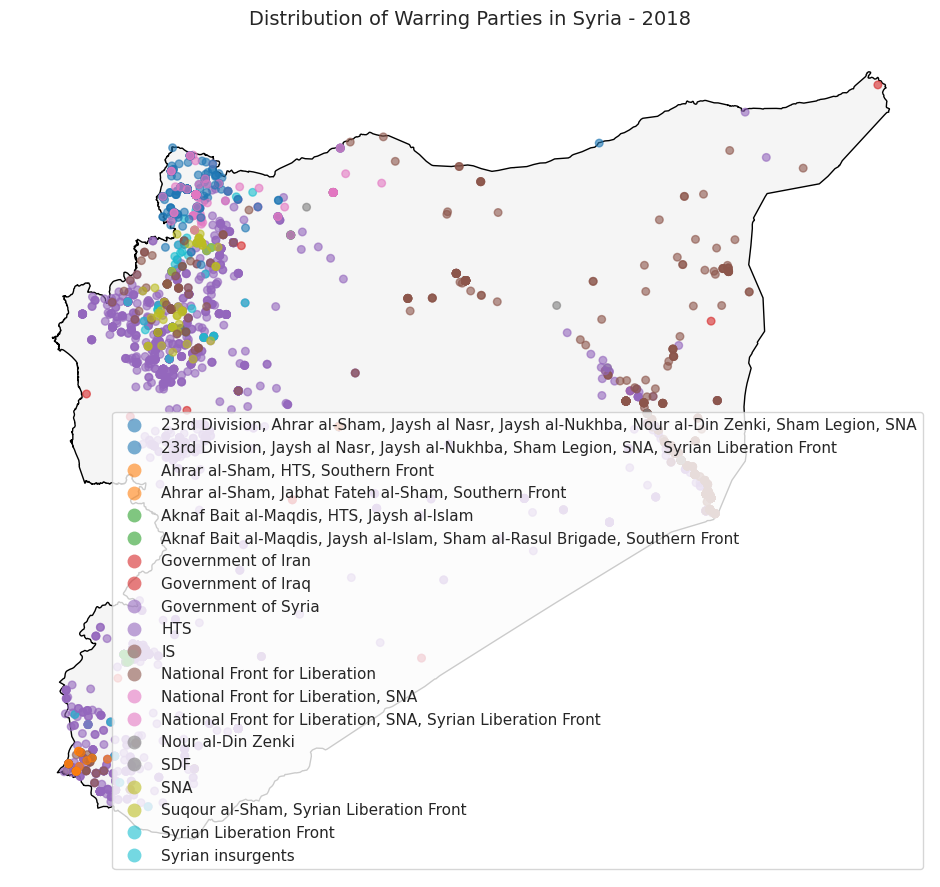

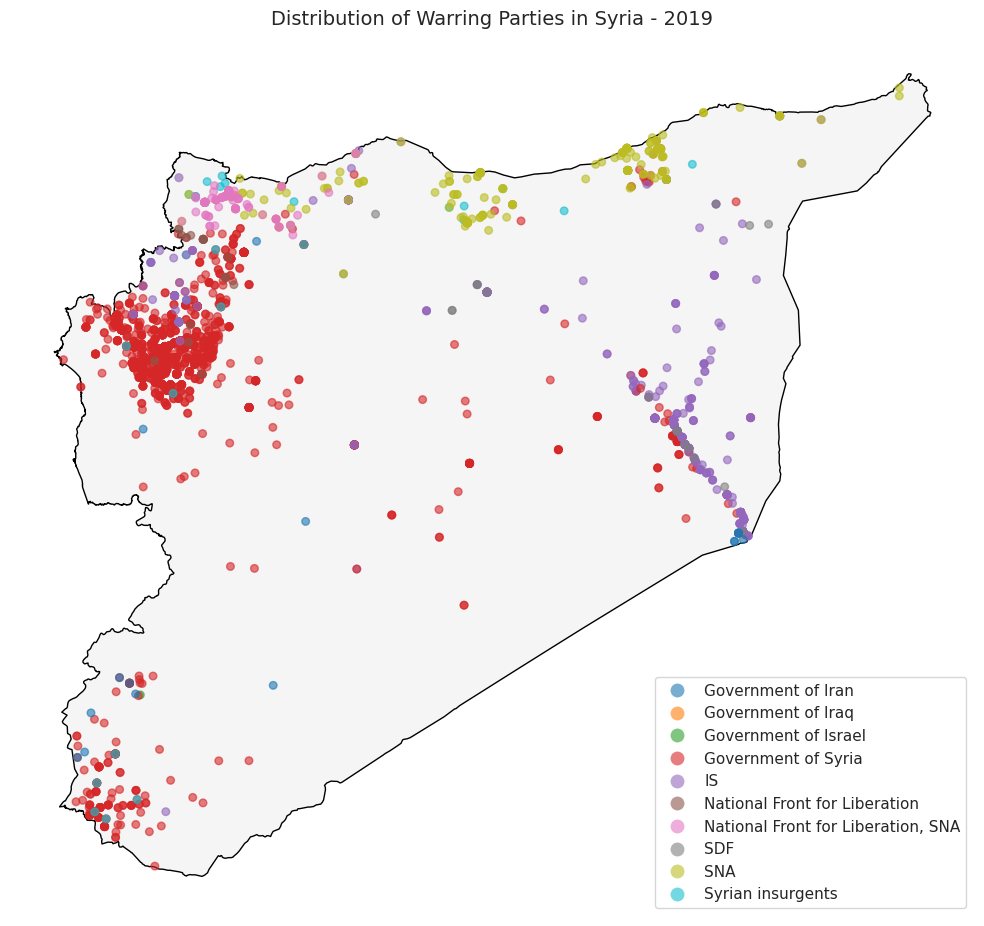

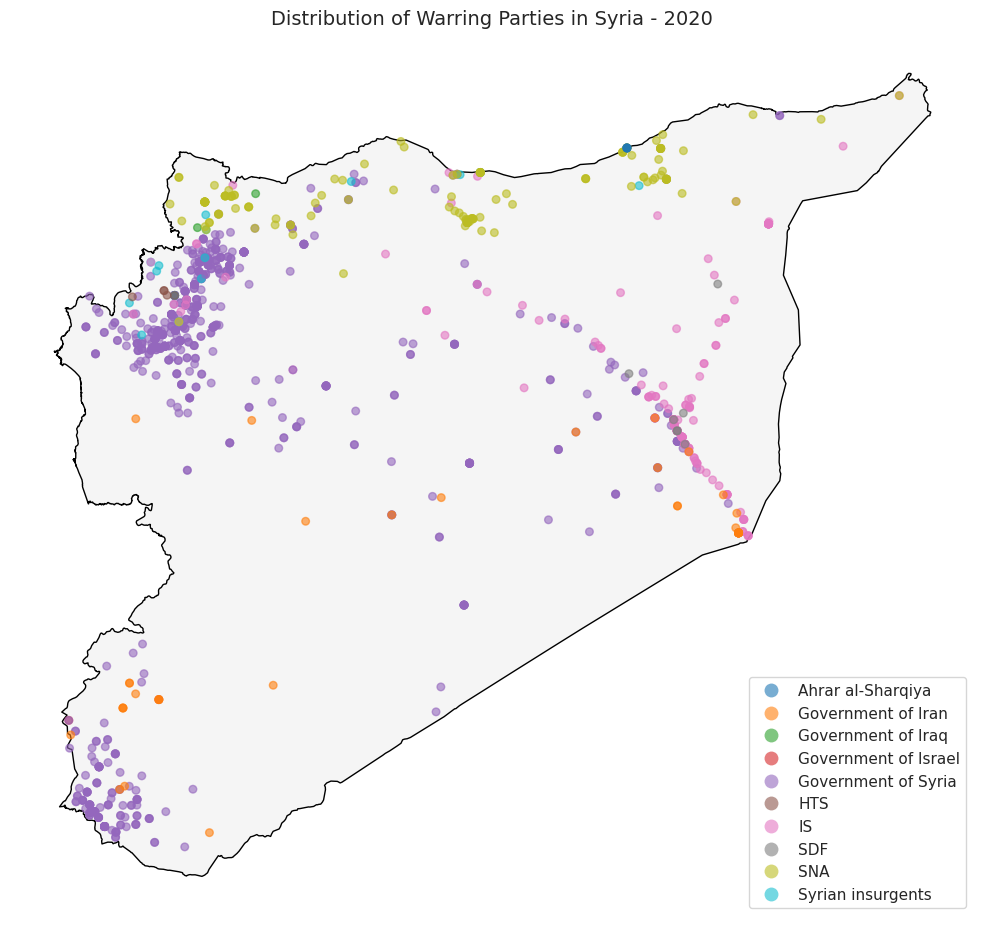

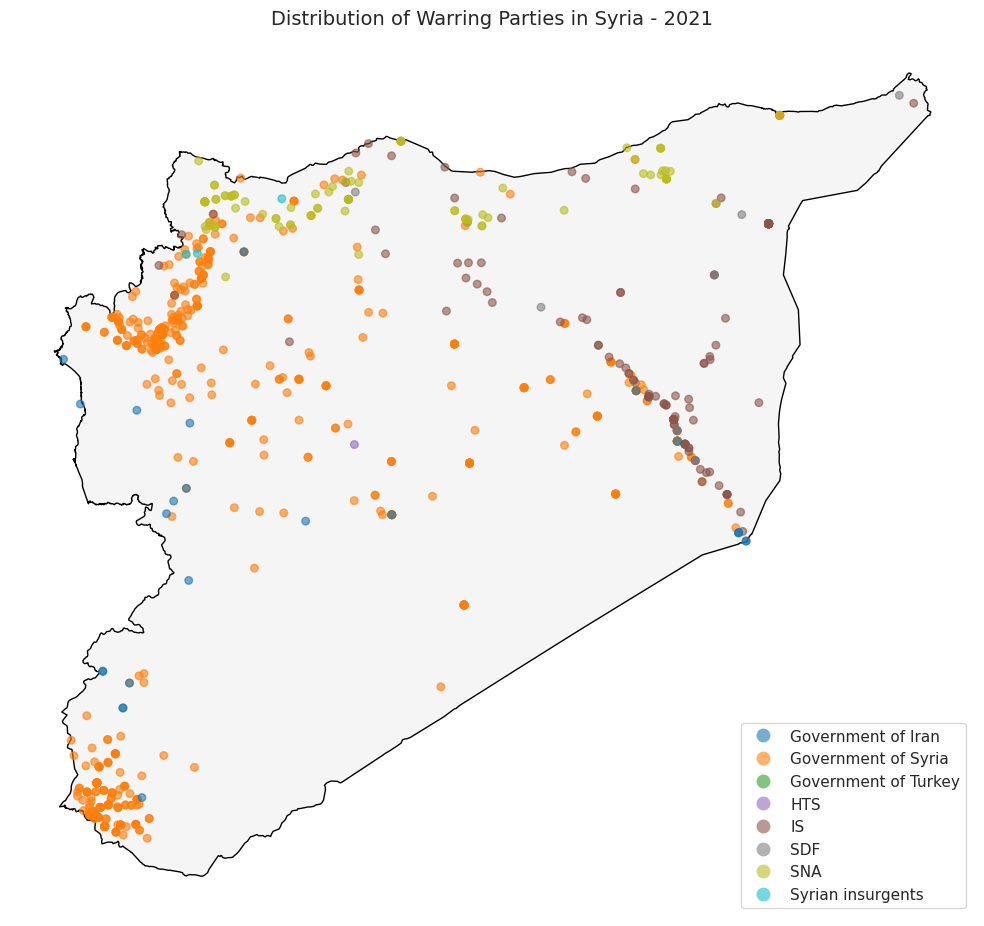

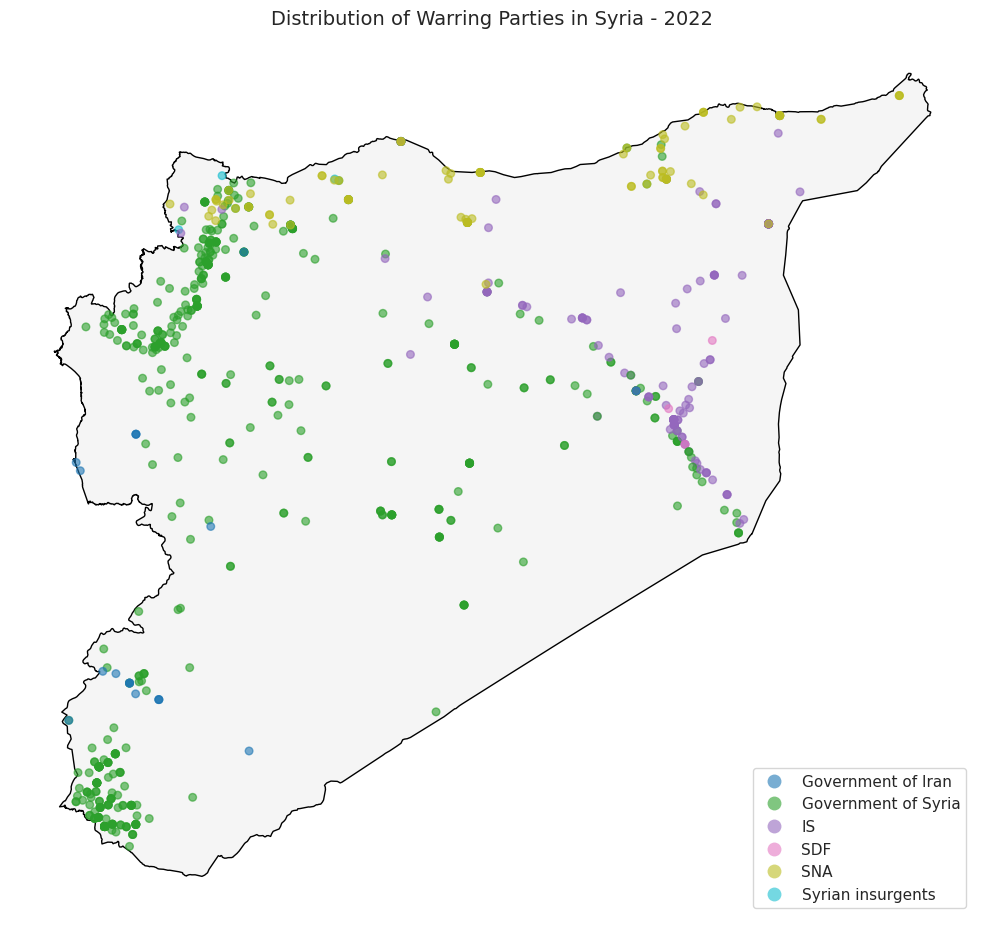

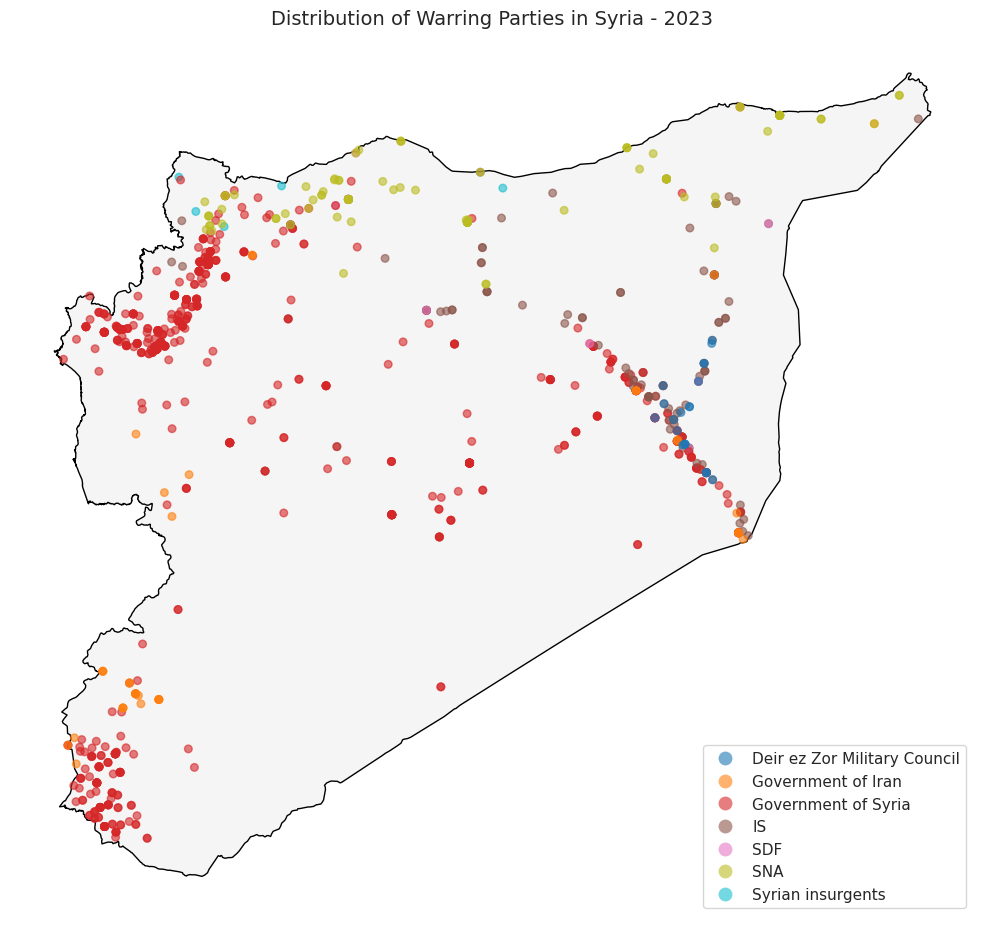

In [ ]:

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# تحميل خريطة سوريا
syria_map = gpd.read_file("geoBoundaries-SYR-ADM0_simplified.geojson")

# بياناتك الأصلية (تأكد أن df موجود ويحتوي على الأعمدة المذكورة)
# df يجب أن يحتوي على: year, latitude, longitude, side_a

# قاموس الترجمة إلى الإنجليزية
translation_dict = {
    'قوات النظام السوري': 'Syrian Government Forces',
    'قوات سوريا الديمقراطية': 'Syrian Democratic Forces (SDF)',
    'هيئة تحرير الشام': 'HTS',
    'تنظيم الدولة الإسلامية': 'ISIS',
    'الجيش الحر': 'Free Syrian Army',
    'الميليشيات الإيرانية': 'Iranian Militias',
    'قسد': 'Syrian Democratic Forces (SDF)',
    'النظام السوري': 'Syrian Government Forces',
    'الجيش السوري': 'Syrian Government Forces',
    'داعش': 'ISIS',
    'النصرة': 'HTS',
    'الجيش الحر': 'Free Syrian Army'
    # أضف ترجمات إضافية إذا لزم الأمر
}

# تطبيق الترجمة على side_a
df['side_a_en'] = df['side_a'].map(translation_dict).fillna(df['side_a'])

# استخراج جميع السنوات المتوفرة في البيانات
years = sorted(df['year'].dropna().unique())

# رسم خريطة لكل سنة
for year in years:
    df_year = df[df['year'] == year].dropna(subset=['latitude', 'longitude', 'side_a_en'])

    # إذا لم توجد بيانات للسنة، تخطاها
    if df_year.empty:
        continue

    gdf_points = gpd.GeoDataFrame(
        df_year,
        geometry=gpd.points_from_xy(df_year['longitude'], df_year['latitude']),
        crs="EPSG:4326"
    )

    # رسم الخريطة
    fig, ax = plt.subplots(figsize=(10, 10))
    syria_map.plot(ax=ax, color='whitesmoke', edgecolor='black')

    # رسم النقاط وتلوينها حسب الجهة المشاركة
    gdf_points.plot(ax=ax, column='side_a_en', legend=True, alpha=0.6, markersize=30, cmap='tab10')

    plt.title(f"Distribution of Warring Parties in Syria - {year}", fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()